In [ ]:
'''
Aim: Feature Transformation 
A) To use PCA Algorithm for dimensionality reduction. You have a dataset that 
includes measurements for different variables on wine (alcohol, ash, 
magnesium, and so on). Apply PCA algorithm & transform this data so that 
most variations in the measurements of the variables are captured by a small 
number of principal components so that it is easier to distinguish between red 
and white wine by inspecting these principal components. Dataset Link: 
https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv 

'''

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
# Load your wine dataset

#Path 
path = r"C:\Users\Aditya\Downloads\\Wine.csv"

df = pd.read_csv(path)
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [40]:
df.shape

(178, 14)

In [42]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [43]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [44]:
# Separating features and target variable
X = df.drop(columns=['Customer_Segment'])  # Features (measurements)
y = df['Customer_Segment']  # Target variable (Type of wine)

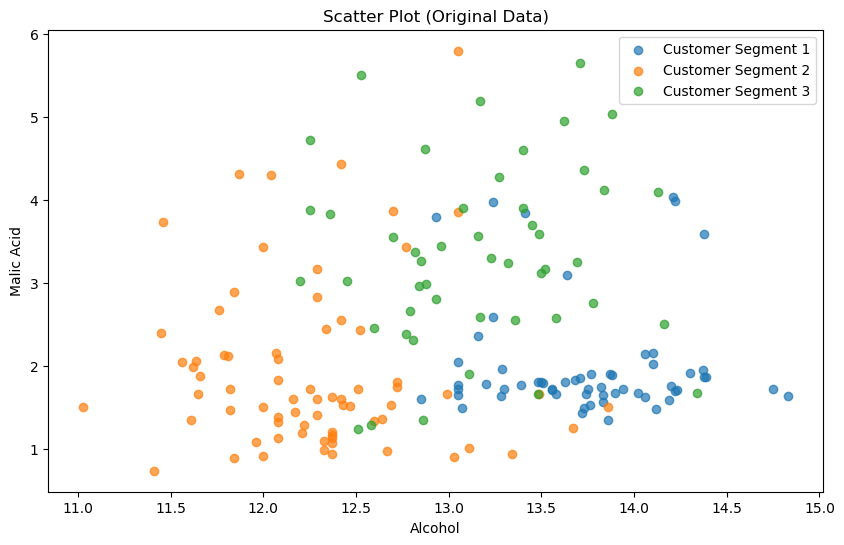

In [45]:
# Scatter plot before applying PCA
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1]['Alcohol'], X[y == 1]['Malic_Acid'], label='Customer Segment 1', alpha=0.7)
plt.scatter(X[y == 2]['Alcohol'], X[y == 2]['Malic_Acid'], label='Customer Segment 2', alpha=0.7)
plt.scatter(X[y == 3]['Alcohol'], X[y == 3]['Malic_Acid'], label='Customer Segment 3', alpha=0.7)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()
plt.title('Scatter Plot (Original Data)')
plt.show()

In [46]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [48]:
# A new DataFrame with the first two principal components
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Customer_Segment'] = y

In [49]:
from sklearn.decomposition import PCA
import pandas as pd

# Apply PCA (keep 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame of principal components
pc_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print(pc_df.head())


          PC1        PC2
0  318.562979  21.492131
1  303.097420  -5.364718
2  438.061133  -6.537309
3  733.240139   0.192729
4  -11.571428  18.489995


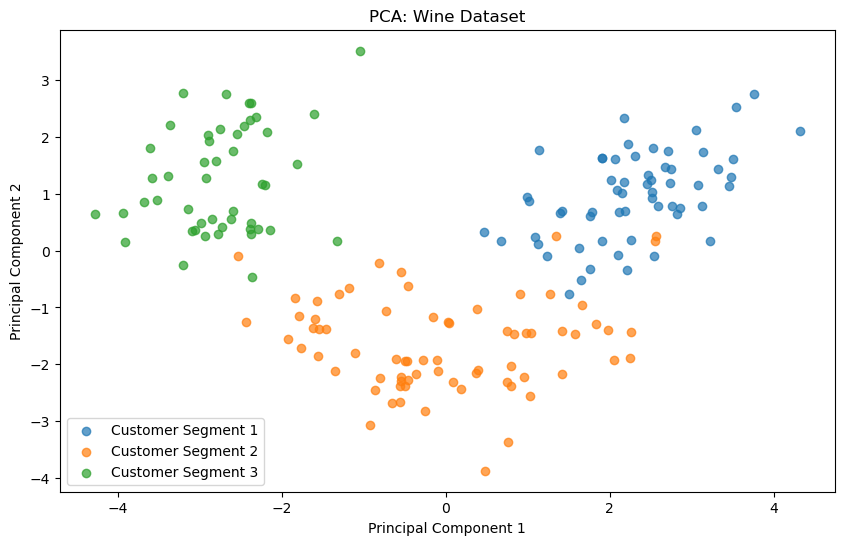

In [50]:
# Visualize the data using the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[pca_df['Customer_Segment'] == 1]['Principal Component 1'], pca_df[pca_df['Customer_Segment'] == 1]['Principal Component 2'], label='Customer Segment 1', alpha=0.7)
plt.scatter(pca_df[pca_df['Customer_Segment'] == 2]['Principal Component 1'], pca_df[pca_df['Customer_Segment'] == 2]['Principal Component 2'], label='Customer Segment 2', alpha=0.7)
plt.scatter(pca_df[pca_df['Customer_Segment'] == 3]['Principal Component 1'], pca_df[pca_df['Customer_Segment'] == 3]['Principal Component 2'], label='Customer Segment 3', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA: Wine Dataset')
plt.show()